In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from shapely.geometry import Polygon
from rasterio.plot import show
from descartes import PolygonPatch

# Plotting basic polygon

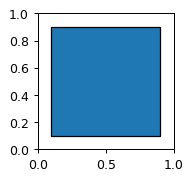

In [8]:
poly = Polygon([(.1,.1),(.9,.1),(.9,.9),(.1,.9),(.1,.1)])
x,y = poly.exterior.xy
fig = plt.figure(1, figsize=(2,2), dpi=90)
ax = plt.subplot(111)
ring_patch = PolygonPatch(poly)
ax.add_patch(ring_patch)
ax.set_aspect(1)

# Classes to support 3D modeling

In [9]:
class Vert:
    def __init__(self, x:float, y:float, z:float=0):
        self.x,self.y,self.z = x, y, z
    def __str__(self):
        return f"x:{self.x} y:{self.y} z:{self.z}"
    def get_xy(self):
        return (self.x, self.y)

In [11]:
class Face(Polygon):
    def __init__(self, verts:[Vert]):
        super(Face, self).__init__(list(map(lambda lam:lam.get_xy(), verts[:]+verts[:1])))
        self.verts = verts
    def patch(self) -> PolygonPatch:
        return PolygonPatch(super())

In [12]:
verts = [Vert(.1,.1), Vert(.9,.1), Vert(.9,.9), Vert(.1,.9)]
face = Face(verts)

# Plotting faces 

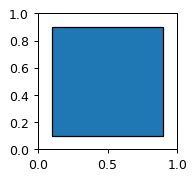

In [13]:
fig = plt.figure(1, figsize=(2,2), dpi=90)
ax = fig.add_subplot(111)
ax.add_patch(face.patch())

# Rectangle and square

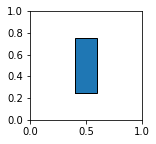

In [23]:
class Rectangle(Face):
    def __init__(self, width:float, height:float, origin=(.0,.0)):
        super(Rectangle, self).__init__([
            Vert(origin[0]-width/2, origin[1]-height/2),
            Vert(origin[0]+width/2, origin[1]-height/2),
            Vert(origin[0]+width/2, origin[1]+height/2),
            Vert(origin[0]-width/2, origin[1]+height/2),
        ])

class Square(Rectangle):
    def __init__(self, width:float, origin=(.0,.0)):
        super(Square, self).__init__(width,width,origin)
        
sqr = Rectangle(.2,.5, (.5,.5))
fig = plt.figure(1, figsize=(2,2))
ax = fig.add_subplot(111)
ax.add_patch(sqr.patch())

### At this point I realized shapely doesn't support z-axis